<a href="https://colab.research.google.com/github/RJGiannini/nft-project-group8/blob/main/collection_data10_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import requests
import json
from pprint import pprint

In [2]:
# Upload collections_list.xlsx to Colab
from google.colab import files

csv_file = files.upload()

Saving collections_list.xlsx to collections_list.xlsx


In [3]:
# Read the collections_list.xlsx file from the Resources folder into a Pandas DataFrame
collections_df = pd.read_excel("collections_list.xlsx")

# Review the DataFrame
#collections_df

In [4]:
#collection_list
collection_list = [x for x in collections_df['Name']]

In [5]:
#collection_list_two
collection_list_two = []
for i in collection_list:
  collection_list_two.append(i.replace(" ", "-"))

In [6]:
#collection_list_three
collection_list_three = []
for i in collection_list_two:
  collection_list_three.append(i.lower())

In [7]:
df = pd.DataFrame()
for collection in collection_list_three:
  
  url = "https://api.opensea.io/api/v1/assets?order_by=sale_count&order_direction=desc&offset=0&limit=50&collection=" + collection

  JSONContent = requests.get(url).json()

  content = json.dumps(JSONContent, indent = 2, sort_keys=True)

  JSONContent.keys()

  df = df.append(JSONContent["assets"])

In [8]:
#df

In [9]:
collection_df = df['collection'].apply(pd.Series)
#collection_df

In [10]:
#Collection Name
collection_name = collection_df["name"].apply(pd.Series)
collection_name.columns = ['Collection Name']
#collection_name

In [11]:
last_sale_df = df['last_sale'].apply(pd.Series)
#last_sale_df

In [12]:
#Last Sale Price in ETH
total_price = last_sale_df['total_price'].apply(pd.Series)
total_price.columns = ['Last Sale Price ETH']
total_price = total_price.astype(float)* 0.000000000000000001
total_price = total_price.fillna(0)
total_price

,Last Sale Price ETH
0,1.740
1,2.750
2,2.200
3,2.250
4,1.840
...,...
46,0.000
47,0.195
48,4.300
49,0.090


In [13]:
total_price['High Value'] = total_price['Last Sale Price ETH'].apply(lambda x: '0' if x <= 0.25 else '1')

In [14]:
total_price

,Last Sale Price ETH,High Value
0,1.740,1
1,2.750,1
2,2.200,1
3,2.250,1
4,1.840,1
...,...,...
46,0.000,0
47,0.195,0
48,4.300,1
49,0.090,0


In [15]:
#payment_token_df = last_sale_df['payment_token'].apply(pd.Series)
#payment_token_df

In [16]:
#Current ETH TO USD price
#usd_price = payment_token_df['usd_price'].apply(pd.Series)
#usd_price.columns = ['ETH TO USD']
#usd_price = usd_price.astype(float)

In [17]:
background_color = df['background_color']
#background_color

In [18]:
#Creates New Columns and Lists Asset Traits
traits_list = df['traits'].apply(pd.Series)
traits_list.columns = ['Trait1', 'Trait2', 'Trait3', 'Trait4',
                  'Trait5', 'Trait6', 'Trait7', 'Trait8',
                  'Trait9', 'Trait10', 'Trait11', 'Trait12',
                  'Trait13', 'Trait14', 'Trait15']

                  # Trait count varies in length due to changes in real time data.
                  #, 'Trait16','Trait17', 'Trait18', 'Trait19', 'Trait20', 'Trait21', 'Trait22'

traits_list

,Trait1,Trait2,Trait3,Trait4,Trait5,Trait6,Trait7,Trait8,Trait9,Trait10,Trait11,Trait12,Trait13,Trait14,Trait15
0,"{'trait_type': 'Strength', 'value': 3, 'displa...","{'trait_type': 'Spirit', 'value': 1, 'display_...","{'trait_type': 'Background', 'value': 'Citrine...","{'trait_type': 'Eyes', 'value': 'Open (Citrine...","{'trait_type': 'Style', 'value': 3, 'display_t...","{'trait_type': 'Mouth', 'value': 'Neutral', 'd...","{'trait_type': 'Head', 'value': 'Headphones (P...","{'trait_type': 'Hair', 'value': 'Bob (Rose)', ...","{'trait_type': 'Type', 'value': 'Y0K-A1', 'dis...","{'trait_type': 'Wear', 'value': 'Thermal Hoodi...","{'trait_type': 'Body', 'value': 'Jasper', 'dis...","{'trait_type': 'Extra', 'value': 'Void', 'disp...","{'trait_type': 'Face', 'value': 'Glasses (Obsi...",NaN,NaN
1,"{'trait_type': 'Eyes', 'value': 'Half Open (Az...","{'trait_type': 'Spirit', 'value': 2, 'display_...","{'trait_type': 'Style', 'value': 3, 'display_t...","{'trait_type': 'Strength', 'value': 5, 'displa...","{'trait_type': 'Body', 'value': 'Azurite', 'di...","{'trait_type': 'Face', 'value': 'Bandaid', 'di...","{'trait_type': 'Head', 'value': 'Void', 'displ...","{'trait_type': 'Wear', 'value': 'Bomber Jacket...","{'trait_type': 'Type', 'value': 'Y0K-A1', 'dis...","{'trait_type': 'Background', 'value': 'Azurite...","{'trait_type': 'Extra', 'value': 'Void', 'disp...","{'trait_type': 'Mouth', 'value': 'Smirk', 'dis...","{'trait_type': 'Hair', 'value': 'Spiky (Obsidi...",NaN,NaN
2,"{'trait_type': 'Extra', 'value': '0N1 Logo Pin...","{'trait_type': 'Hair', 'value': 'Spiky (Citrin...","{'trait_type': 'Face', 'value': 'PR Mask (Jasp...","{'trait_type': 'Style', 'value': 5, 'display_t...","{'trait_type': 'Body', 'value': 'Azurite', 'di...","{'trait_type': 'Mouth', 'value': 'Neutral', 'd...","{'trait_type': 'Spirit', 'value': 4, 'display_...","{'trait_type': 'Head', 'value': 'Headphones (P...","{'trait_type': 'Strength', 'value': 4, 'displa...","{'trait_type': 'Type', 'value': 'Y0K-A1', 'dis...","{'trait_type': 'Background', 'value': 'Azurite...","{'trait_type': 'Wear', 'value': 'Thermal Hoodi...","{'trait_type': 'Eyes', 'value': 'Squint (Azuri...",NaN,NaN
3,"{'trait_type': 'Extra', 'value': '0N1 Logo Pin...","{'trait_type': 'Wear', 'value': 'Kimono (Rose)...","{'trait_type': 'Background', 'value': 'Citrine...","{'trait_type': 'Head', 'value': 'Headphones (T...","{'trait_type': 'Style', 'value': 3, 'display_t...","{'trait_type': 'Eyes', 'value': 'Half Open (Ci...","{'trait_type': 'Body', 'value': 'Azurite', 'di...","{'trait_type': 'Mouth', 'value': 'Neutral', 'd...","{'trait_type': 'Face', 'value': 'Nose Scar', '...","{'trait_type': 'Hair', 'value': 'Bob (Obsidian...","{'trait_type': 'Spirit', 'value': 4, 'display_...","{'trait_type': 'Type', 'value': 'Y0K-A1', 'dis...","{'trait_type': 'Strength', 'value': 1, 'displa...",NaN,NaN
4,"{'trait_type': 'Face', 'value': 'Void', 'displ...","{'trait_type': 'Background', 'value': 'Citrine...","{'trait_type': 'Eyes', 'value': 'Open (Citrine...","{'trait_type': 'Body', 'value': 'Azurite', 'di...","{'trait_type': 'Mouth', 'value': 'Neutral', 'd...","{'trait_type': 'Head', 'value': 'Void', 'displ...","{'trait_type': 'Wear', 'value': 'Bomber Jacket...","{'trait_type': 'Strength', 'value': 4, 'displa...","{'trait_type': 'Type', 'value': 'Y0K-A1', 'dis...","{'trait_type': 'Style', 'value': 1, 'display_t...","{'trait_type': 'Spirit', 'value': 1, 'display_...","{'trait_type': 'Hair', 'value': 'Half-Buzz (Tu...","{'trait_type': 'Extra', 'value': 'Earring (Dou...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,"{'trait_type': 'breed_type', 'value': 'genesis...","{'trait_type': 'bloodline', 'value': 'Nakamoto...","{'trait_type': 'coat_color', 'value': 'Coral W...","{'trait_type': 'gender', 'value': 'Female', 'd...","{'trait_type': 'genotype', 'value': 'Z1', 'dis...","{'trait_type': 'horse_type', 'value': 'Mare', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,"{'trait_type': 'breed_type', 'value': '

In [19]:
#Replaces NaN values with 0 and Trait Values with 1
traits = traits_list[['Trait1', 'Trait2', 'Trait3', 'Trait4',
                  'Trait5', 'Trait6', 'Trait7', 'Trait8',
                  'Trait9', 'Trait10', 'Trait11', 'Trait12',
                  'Trait13', 'Trait14', 'Trait15']] = traits_list[['Trait1', 'Trait2', 'Trait3', 'Trait4',
                  'Trait5', 'Trait6', 'Trait7', 'Trait8',
                  'Trait9', 'Trait10', 'Trait11', 'Trait12',
                  'Trait13', 'Trait14', 'Trait15']].applymap(lambda x: 0 if pd.isnull(x) else 1)

In [20]:
#Calculates Sum of traits
total_traits = traits.apply(lambda row: row.Trait1 + row.Trait2 + row.Trait3
                            + row.Trait4 +row.Trait5 + row.Trait6 + row.Trait7
                            + row.Trait8 + row.Trait9 + row.Trait10 + row.Trait11 
                            + row.Trait12 + row.Trait13 + row.Trait14 + row.Trait15 
                            , axis = 1)

In [21]:
collection_data_df = df[['name', 'token_id', 'num_sales', 'background_color',]].copy()

In [22]:
collection_data_df = pd.concat([collection_data_df, collection_name, total_price, traits_list, total_traits], axis = 1)
collection_data_df.columns = ['Asset Name', 'Token ID', 'Number of Sales', 'Background Color', 'Collection Name', 'Last Sale Price (ETH)', 'High Value (1 = Y, 0 = N)', 'Trait1', 'Trait2', 'Trait3', 'Trait4',
                  'Trait5', 'Trait6', 'Trait7', 'Trait8',
                  'Trait9', 'Trait10', 'Trait11', 'Trait12',
                  'Trait13', 'Trait14', 'Trait15', 'Trait Count']

In [23]:
collection_data_df

,Asset Name,Token ID,Number of Sales,Background Color,Collection Name,Last Sale Price (ETH),"High Value (1 = Y, 0 = N)",Trait1,Trait2,Trait3,Trait4,Trait5,Trait6,Trait7,Trait8,Trait9,Trait10,Trait11,Trait12,Trait13,Trait14,Trait15,Trait Count
0,0N1 #6911,6911,13,None,0N1 Force,1.740,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,13
1,0N1 #3338,3338,11,None,0N1 Force,2.750,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,13
2,0N1 #2181,2181,10,None,0N1 Force,2.200,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,13
3,0N1 #1601,1601,10,None,0N1 Force,2.250,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,13
4,0N1 #4796,4796,9,None,0N1 Force,1.840,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,Watch Your Spending,287,3,None,Zed Run,0.000,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,6
47,Casino Empress,3489,3,None,Zed Run,0.195,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,6
48,Long Fly,48,3,,Zed Run,4.300,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,6
49,Venus,5785,3,None,Zed Run,0.090,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,6


In [24]:
collection_data_df.dtypes

Asset Name                    object
Token ID                      object
Number of Sales                int64
Background Color              object
Collection Name               object
Last Sale Price (ETH)        float64
High Value (1 = Y, 0 = N)     object
Trait1                         int64
Trait2                         int64
Trait3                         int64
Trait4                         int64
Trait5                         int64
Trait6                         int64
Trait7                         int64
Trait8                         int64
Trait9                         int64
Trait10                        int64
Trait11                        int64
Trait12                        int64
Trait13                        int64
Trait14                        int64
Trait15                        int64
Trait Count                    int64
dtype: object

In [95]:
collection_data_df["Background Color"].value_counts()

000000    51
6B80D9     8
262626     6
           5
3A65AD     4
7F82CA     4
8AD9E9     3
887FCA     3
717AC3     3
6972BE     2
6BABD9     2
FF8A98     2
7FA0CA     2
D37AD6     1
6F7DCF     1
7463E2     1
F3FFB1     1
4350B9     1
97FDDA     1
5551C5     1
5144AD     1
4053B4     1
5CC5BA     1
Name: Background Color, dtype: int64

In [96]:
collection_data_df["Collection Name"].value_counts()

Sneaky Vampire Syndicate      50
Lazy Lions                    50
Bored Ape Kennel Club         50
CyberKongz                    50
Loopy Donuts                  50
                              ..
Stories of Women!              4
Bored Ape Chemistry Club       3
Non Fungible Fungi Genesis     2
ZombieToadz                    1
Galaxy Eggs - old              1
Name: Collection Name, Length: 66, dtype: int64

In [97]:
collection_data_df_cat = collection_data_df[['Background Color','Collection Name','Trait Count']]
collection_data_df_cat

,Background Color,Collection Name,Trait Count
0,None,0N1 Force,13
1,None,0N1 Force,13
2,None,0N1 Force,13
3,None,0N1 Force,13
4,None,0N1 Force,13
...,...,...,...
46,None,Zed Run,6
47,None,Zed Run,6
48,,Zed Run,6
49,None,Zed Run,6


In [98]:
collection_data_df_cat.dtypes

Background Color    object
Collection Name     object
Trait Count          int64
dtype: object

In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
# Create encoder
le = LabelEncoder()

In [101]:
collection_data_df_cat = collection_data_df_cat.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [102]:
collection_data_df_cat = pd.concat([collection_data_df_cat, total_price], axis = 1)

In [103]:
collection_data_df_cat.dtypes

Background Color         int64
Collection Name          int64
Trait Count              int64
Last Sale Price ETH    float64
High Value              object
dtype: object

In [113]:
collection_data_df_cat = collection_data_df_cat.drop(columns="Last Sale Price ETH")
collection_data_df_cat

,Background Color,Collection Name,Trait Count,High Value
0,23,0,5,1
1,23,0,5,1
2,23,0,5,1
3,23,0,5,1
4,23,0,5,1
...,...,...,...,...
46,23,64,12,0
47,23,64,12,0
48,0,64,12,1
49,23,64,12,0


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [115]:
enc = OneHotEncoder(sparse=False)

In [116]:
encoded_data = enc.fit_transform(collection_data_df_cat)
encoded_data

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [118]:
categorical_variables = ['Background Color','Collection Name', 'Trait Count', 'High Value']
encoded_df = pd.DataFrame(encoded_data, columns = enc.get_feature_names(categorical_variables))

# Review the DataFrame
encoded_df

,Background Color_0,Background Color_1,Background Color_2,Background Color_3,Background Color_4,Background Color_5,Background Color_6,Background Color_7,Background Color_8,Background Color_9,Background Color_10,Background Color_11,Background Color_12,Background Color_13,Background Color_14,Background Color_15,Background Color_16,Background Color_17,Background Color_18,Background Color_19,Background Color_20,Background Color_21,Background Color_22,Background Color_23,Collection Name_0,Collection Name_1,Collection Name_2,Collection Name_3,Collection Name_4,Collection Name_5,Collection Name_6,Collection Name_7,Collection Name_8,Collection Name_9,Collection Name_10,Collection Name_11,Collection Name_12,Collection Name_13,Collection Name_14,Collection Name_15,...,Collection Name_44,Collection Name_45,Collection Name_46,Collection Name_47,Collection Name_48,Collection Name_49,Collection Name_50,Collection Name_51,Collection Name_52,Collection Name_53,Collection Name_54,Collection Name_55,Collection Name_56,Collection Name_57,Collection Name_58,Collection Name_59,Collection Name_60,Collection Name_61,Collection Name_62,Collection Name_63,Collection Name_64,Collection Name_65,Trait Count_0,Trait Count_1,Trait Count_2,Trait Count_3,Trait Count_4,Trait Count_5,Trait Count_6,Trait Count_7,Trait Count_8,Trait Count_9,Trait Count_10,Trait Count_11,Trait Count_12,Trait Count_13,Trait Count_14,Trait Count_15,High Value_0,High Value_1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0

In [119]:
categorical_variables

['Background Color', 'Collection Name', 'Trait Count', 'High Value']

In [120]:
# Define the target set y using the IS_SUCCESSFUL column
y = encoded_df["High Value_1"]

# Display a sample of y
y[:20]

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    0.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
Name: High Value_1, dtype: float64

In [121]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = encoded_df.drop(columns=["High Value_0",	"High Value_1"])

# Review the features DataFrame
X.head()

,Background Color_0,Background Color_1,Background Color_2,Background Color_3,Background Color_4,Background Color_5,Background Color_6,Background Color_7,Background Color_8,Background Color_9,Background Color_10,Background Color_11,Background Color_12,Background Color_13,Background Color_14,Background Color_15,Background Color_16,Background Color_17,Background Color_18,Background Color_19,Background Color_20,Background Color_21,Background Color_22,Background Color_23,Collection Name_0,Collection Name_1,Collection Name_2,Collection Name_3,Collection Name_4,Collection Name_5,Collection Name_6,Collection Name_7,Collection Name_8,Collection Name_9,Collection Name_10,Collection Name_11,Collection Name_12,Collection Name_13,Collection Name_14,Collection Name_15,...,Collection Name_42,Collection Name_43,Collection Name_44,Collection Name_45,Collection Name_46,Collection Name_47,Collection Name_48,Collection Name_49,Collection Name_50,Collection Name_51,Collection Name_52,Collection Name_53,Collection Name_54,Collection Name_55,Collection Name_56,Collection Name_57,Collection Name_58,Collection Name_59,Collection Name_60,Collection Name_61,Collection Name_62,Collection Name_63,Collection Name_64,Collection Name_65,Trait Count_0,Trait Count_1,Trait Count_2,Trait Count_3,Trait Count_4,Trait Count_5,Trait Count_6,Trait Count_7,Trait Count_8,Trait Count_9,Trait Count_10,Trait Count_11,Trait Count_12,Trait Count_13,Trait Count_14,Trait Count_15
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [123]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [124]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

106

In [125]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [126]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 =  (number_input_features + number_output_neurons) // 2

# Review the number hidden nodes in the first layer
hidden_nodes_layer1

53

In [127]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = (hidden_nodes_layer1 + number_output_neurons) // 2

# Review the number hidden nodes in the second layer
hidden_nodes_layer2

27

In [128]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [129]:
# Create the Sequential model instance
nn = Sequential()

In [130]:

# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

In [131]:

# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

In [132]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))

In [133]:
# Display the Sequential model summary
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 53)                5671      
_________________________________________________________________
dense_8 (Dense)              (None, 27)                1458      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 28        
Total params: 7,157
Trainable params: 7,157
Non-trainable params: 0
_________________________________________________________________


In [134]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [135]:
# Fit the model using 50 epochs and the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
67/67 [==============================] - 1s 2ms/step - loss: 0.4393 - accuracy: 0.8172
Epoch 2/50
67/67 [==============================] - 0s 2ms/step - loss: 0.2624 - accuracy: 0.9093
Epoch 3/50
67/67 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9331
Epoch 4/50
67/67 [==============================] - 0s 2ms/step - loss: 0.1907 - accuracy: 0.9369
Epoch 5/50
67/67 [==============================] - 0s 2ms/step - loss: 0.1777 - accuracy: 0.9378
Epoch 6/50
67/67 [==============================] - 0s 2ms/step - loss: 0.1761 - accuracy: 0.9378
Epoch 7/50
67/67 [==============================] - 0s 2ms/step - loss: 0.1716 - accuracy: 0.9331
Epoch 8/50
67/67 [==============================] - 0s 2ms/step - loss: 0.1719 - accuracy: 0.9360
Epoch 9/50
67/67 [==============================] - 0s 2ms/step - loss: 0.1694 - accuracy: 0.9360
Epoch 10/50
67/67 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9374
Epoch 11/50
67/67 [

In [136]:
print("Original Model Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Original Model Results
23/23 - 0s - loss: 0.2184 - accuracy: 0.9467
Loss: 0.2184385508298874, Accuracy: 0.946704089641571


In [137]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

106

In [138]:
# Define the number of neurons in the output layer
number_output_neurons_A1 = 1

In [139]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A1 = (number_input_features + number_output_neurons_A1) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A1

53

In [140]:
# Create the Sequential model instance
nn_A1 = Sequential()

In [141]:
# First hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer1_A1, input_dim=number_input_features, activation="relu"))

# Output layer
nn_A1.add(Dense(units=number_output_neurons_A1, activation="sigmoid"))

# Check the structure of the model
nn_A1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 53)                5671      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 54        
Total params: 5,725
Trainable params: 5,725
Non-trainable params: 0
_________________________________________________________________


In [142]:
# Compile the Sequential model
nn_A1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [143]:
# Fit the model using 50 epochs and the training data
fit_model_A1 = nn_A1.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
67/67 [==============================] - 1s 2ms/step - loss: 0.5297 - accuracy: 0.7359
Epoch 2/50
67/67 [==============================] - 0s 2ms/step - loss: 0.2926 - accuracy: 0.8925
Epoch 3/50
67/67 [==============================] - 0s 2ms/step - loss: 0.2269 - accuracy: 0.9313
Epoch 4/50
67/67 [==============================] - 0s 2ms/step - loss: 0.2001 - accuracy: 0.9322
Epoch 5/50
67/67 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9331
Epoch 6/50
67/67 [==============================] - 0s 2ms/step - loss: 0.1821 - accuracy: 0.9303
Epoch 7/50
67/67 [==============================] - 0s 2ms/step - loss: 0.1773 - accuracy: 0.9341
Epoch 8/50
67/67 [==============================] - 0s 2ms/step - loss: 0.1750 - accuracy: 0.9350
Epoch 9/50
67/67 [==============================] - 0s 2ms/step - loss: 0.1715 - accuracy: 0.9341
Epoch 10/50
67/67 [==============================] - 0s 2ms/step - loss: 0.1696 - accuracy: 0.9364
Epoch 11/50
67/67 [

ALTERNATIVE MODEL 2

In [144]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

106

In [145]:

# Define the number of neurons in the output layer
number_output_neurons_A2 = 1

In [146]:

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A2 = 80

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A2

80

In [147]:
# Create the Sequential model instance
nn_A2 = Sequential()

In [148]:
# First hidden layer
nn_A2.add(Dense(units=hidden_nodes_layer1_A2, input_dim=number_input_features, activation="relu"))

# Output layer
nn_A2.add(Dense(units=number_output_neurons_A2, activation="sigmoid"))

# Check the structure of the model
nn_A2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 80)                8560      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 81        
Total params: 8,641
Trainable params: 8,641
Non-trainable params: 0
_________________________________________________________________


In [149]:
# Compile the model
nn_A2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [150]:
# Fit the model
fit_model_A2 = nn_A2.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
67/67 [==============================] - 1s 2ms/step - loss: 0.4707 - accuracy: 0.7817
Epoch 2/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.9247
Epoch 3/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9327
Epoch 4/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1862 - accuracy: 0.9327
Epoch 5/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1796 - accuracy: 0.9345
Epoch 6/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1754 - accuracy: 0.9360
Epoch 7/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1734 - accuracy: 0.9336
Epoch 8/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1726 - accuracy: 0.9350
Epoch 9/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1702 - accuracy: 0.9345
Epoch 10/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1696 - accuracy: 0.9350
Epoch 11/

In [151]:
print("Original Model Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Original Model Results
23/23 - 0s - loss: 0.2184 - accuracy: 0.9467
Loss: 0.2184385508298874, Accuracy: 0.946704089641571


In [152]:
print("Alternative Model 1 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A1.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 1 Results
23/23 - 0s - loss: 0.2116 - accuracy: 0.9453
Loss: 0.21156692504882812, Accuracy: 0.9453015327453613


In [153]:
print("Alternative Model 2 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A2.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 2 Results
23/23 - 0s - loss: 0.2169 - accuracy: 0.9467
Loss: 0.2168562412261963, Accuracy: 0.946704089641571


In [121]:
ml_data_df = df[['id', 'num_sales']].copy()

In [122]:
ml_data_df = pd.concat([ml_data_df, total_price, total_traits], axis = 1)
ml_data_df.columns = ['Asset ID', 'Number of Sales','Last Sale Price (ETH)', 'Trait Count']

In [123]:
ml_data_df

,Asset ID,Number of Sales,Last Sale Price (ETH),Trait Count
0,38109417,13,1.740,13
1,38105661,11,2.750,13
2,38104277,10,2.200,13
3,37768360,10,2.250,13
4,38107119,9,1.680,13
...,...,...,...,...
46,3005383,3,0.000,6
47,3706444,3,0.195,6
48,2849847,3,4.300,6
49,15209044,3,0.090,6


In [41]:
ml_data_df.dtypes

Asset ID                   int64
Number of Sales            int64
Last Sale Price (ETH)    float64
Trait Count                int64
dtype: object

In [42]:
ml_data_df.describe()

,Asset ID,Number of Sales,Last Sale Price (ETH),Trait Count
count,2.853000e+03,2853.000000,2853.000000,2853.000000
mean,4.196159e+07,17.667718,4.384143,19.001052
std,1.759545e+07,254.713629,13.603815,0.056166
min,1.605500e+05,0.000000,0.000000,19.000000
25%,2.992358e+07,4.000000,0.409000,19.000000
50%,3.736611e+07,5.000000,1.390000,19.000000
75%,6.137643e+07,7.000000,3.500000,19.000000
max,7.258339e+07,12026.000000,350.000000,22.000000


In [43]:
import seaborn as sns

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

from sklearn import linear_model

In [44]:
ml_data_df.shape

(2853, 4)

In [45]:
ml_data_df = ml_data_df[~ml_data_df.index.duplicated()]

In [46]:
ml_data_df.columns

Index(['Asset ID', 'Number of Sales', 'Last Sale Price (ETH)', 'Trait Count'], dtype='object')

In [47]:
x = ml_data_df[['Number of Sales', 'Trait Count']]

In [48]:
y = ml_data_df['Last Sale Price (ETH)']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
model = LinearRegression()

In [53]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
print(model.coef_)

[-0.05953865  0.        ]


In [55]:
print(model.intercept_)

3.1030495652173906


In [56]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
Number of Sales,-0.059539
Trait Count,0.000000


In [57]:
predictions = model.predict(x_test)

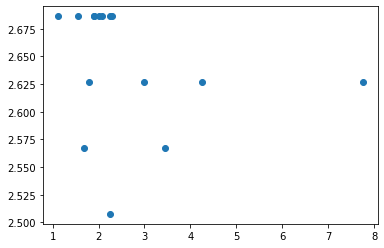

In [58]:
plt.scatter(y_test, predictions)

(array([2., 9., 1., 1., 1., 0., 0., 0., 0., 1.]),
 array([-1.56627903, -0.89732517, -0.2283713 ,  0.44058256,  1.10953643,
         1.77849029,  2.44744415,  3.11639802,  3.78535188,  4.45430575,
         5.12325961]),
 <a list of 10 Patch objects>)

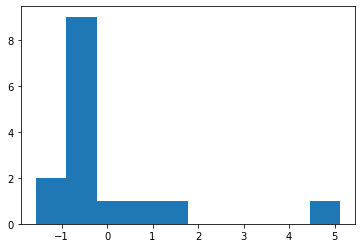

In [59]:
plt.hist(y_test - predictions)

In [60]:
from sklearn import metrics

In [61]:
metrics.mean_absolute_error(y_test, predictions)


1.0916276392914654

In [62]:
metrics.mean_squared_error(y_test, predictions)

2.5009334384694695

In [63]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1.5814339816980882